In [2]:
## import psycopg2
## print(psycopg2.__version__)

In [4]:
import pandas as pd
from sqlalchemy import create_engine

print("pandas and SQLAlchemy imported successfully")

pandas and SQLAlchemy imported successfully


In [6]:
%matplotlib inline

In [7]:
conn = ("postgresql+psycopg2://{username}:{password}"
        "@{host}:{port}/{database}")

print("Connected to PostgreSQL successfully!")

Connected to PostgreSQL successfully!


In [8]:
engine = create_engine(conn.format(
    username="postgres",
    password="IreKayin01$$$",
    host="localhost",
    port=5432,
    database="world"
))


In [10]:
from sqlalchemy import text

with engine.connect() as conn:
    result = conn.execute(text("SELECT * FROM country LIMIT 10;"))
    rows = result.fetchall()

rows

[('ABW', 'Aruba                                               ', 'North America                                     ', 'Caribbean                 ', Decimal('193.00'), None, 103000, Decimal('78.4'), Decimal('828.00'), Decimal('793.00'), 'Aruba                                        ', 'Nonmetropolitan Territory of The Netherlands ', 'Beatrix                                                     ', 129, 'AW'),
 ('AFG', 'Afghanistan                                         ', 'Asia                                              ', 'Southern and Central Asia ', Decimal('652090.00'), 1919, 22720000, Decimal('45.9'), Decimal('5976.00'), None, 'Afganistan/Afqanestan                        ', 'Islamic Emirate                              ', 'Mohammad Omar                                               ', 1, 'AF'),
 ('AGO', 'Angola                                              ', 'Africa                                            ', 'Central Africa            ', Decimal('1246700.00'), 1975, 12878000,

In [11]:
df = pd.read_sql(
    "SELECT * FROM country LIMIT 10;",
    engine
)

df

,code,name,continent,region,surfacearea,indepyear,population,lifeexpectancy,gnp,gnpold,localname,governmentform,headofstate,capital,code2
0,ABW,Aruba ...,North America ...,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,Beatrix ...,129,AW
1,AFG,Afghanistan ...,Asia ...,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,Mohammad Omar ...,1,AF
2,AGO,Angola ...,Africa ...,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,José Eduardo dos Santos ...,56,AO
3,AIA,Anguilla ...,North America ...,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,Elisabeth II ...,62,AI
4,ALB,Albania ...,Europe ...,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,Rexhep Mejdani ...,34,AL
5,AND,Andorra ...,Europe ...,Southern Europe,468.0,1278.0,78000,83.5,1630.0,NaN,Andorra,Parliamentary Coprincipality,...,55,AD
6,ANT,Netherlands Antilles ...,North America ...,Caribbean,800.0,NaN,217000,74.7,1941.0,NaN,Nederlandse Antillen,Nonmetropolitan Territory of The Netherlands,Beatrix ...,33,AN
7,ARE,United Arab Emirates ...,Asia ...,Middle East,83600.0,1971.0,2441000,74.1,37966.0,36846.0,Al-Imarat al-´Arabiya al-Muttahida,Emirate Federation,Zayid bin Sultan al-Nahayan ...,65,AE
8,ARG,Argentina ...,South America ...,South America,2780400.0,1816.0,37032000,75.1,340238.0,323310.0,Argentina,Federal Republic,Fernando de la Rúa ...,69,AR
9,ARM,Armenia ...,Asia ...,Middle East,29800.0,1991.0,3520000,66.4,1813.0,1627.0,Hajastan,Republic,Robert Kotšarjan ...,126,AM


In [12]:
df = pd.read_sql(
    "SELECT * FROM city LIMIT 10;",
    engine
)

df

,id,name,countrycode,district,population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
5,6,Rotterdam,NLD,Zuid-Holland,593321
6,7,Haag,NLD,Zuid-Holland,440900
7,8,Utrecht,NLD,Utrecht,234323
8,9,Eindhoven,NLD,Noord-Brabant,201843
9,10,Tilburg,NLD,Noord-Brabant,193238


In [13]:
df = pd.read_sql(
    "SELECT * FROM countrylanguage LIMIT 10;",
    engine
)

df

,countrycode,language,isofficial,percentage
0,ABW,Dutch,T,5.3
1,ABW,English,F,9.5
2,ABW,Papiamento,F,76.7
3,ABW,Spanish,F,7.4
4,AFG,Balochi,F,0.9
5,AFG,Dari,T,32.1
6,AFG,Pashto,T,52.4
7,AFG,Turkmenian,F,1.9
8,AFG,Uzbek,F,8.8
9,AGO,Ambo,F,2.4


## Question 1

Considering the World database, write a SQL statement that will **display the names of countries that speak more than two official languages**, along with the **number of official languages spoken**.

- Sort the results by **number of languages**, from **most to least**.
- *Hint: There are fewer than 10 countries in the results.*

In [16]:
query = """
SELECT
    c.name AS country_name,
    COUNT(cl.language) AS official_language_count
FROM country c
JOIN countrylanguage cl
    ON c.code = cl.countrycode
WHERE cl.isofficial = 'T'
GROUP BY c.name
HAVING COUNT(cl.language) > 2
ORDER BY official_language_count DESC;
"""

df_languages = pd.read_sql(query, engine)
df_languages

,country_name,official_language_count
0,Switzerland ...,4
1,South Africa ...,4
2,Vanuatu ...,3
3,Belgium ...,3
4,Luxembourg ...,3
5,Peru ...,3
6,Bolivia ...,3
7,Singapore ...,3


## Question 3

Using **Jupyter Notebooks**, write the Python code needed to produce the following graph:

![countries.jpg](./instructions/04-countries.jpg)

(The graph shows country-level results derived from the World database.)

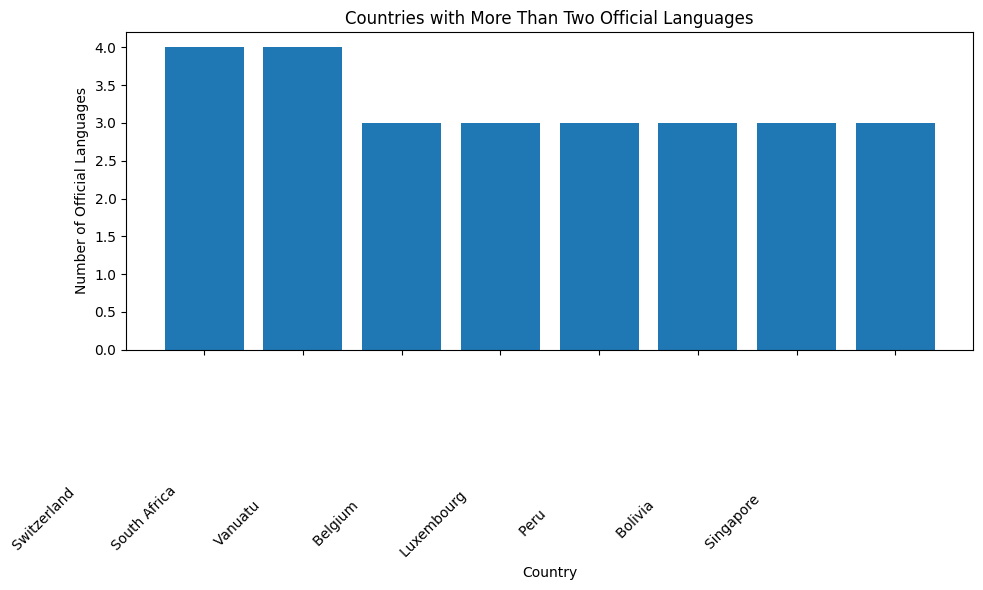

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.bar(
    df_languages["country_name"],
    df_languages["official_language_count"]
)

plt.xlabel("Country")
plt.ylabel("Number of Official Languages")
plt.title("Countries with More Than Two Official Languages")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()